# End to End ML Project

### Steps for ML Project 
1. Import libraries
2. Data Cleaning
3. EDA
4. Data Preprocessing
5. Model Fitting
6. Model Evaluation 
7. Model Optimization
8. Model Interpretation
9. Model Deployment in Streamlit

In [1]:
#!pip install imbalanced-learn

In [2]:
#!pip install shap --user

In [3]:
#!pip install streamlit

In [4]:
#!pip install imbalanced-learn

In [5]:
#!pip install xgboost

### Import Libraries

In [6]:
# for data manipulation 
import pandas as pd
import numpy as np

# for EDA
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(12,7))
plt.style.use("fivethirtyeight")

# import libraries for data preprocessinhg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# librarie for metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, plot_confusion_matrix

# libraries for optimization and interpretation
import shap

# for warnings
import warnings
warnings.filterwarnings("ignore")
print("All libraries are imported")

All libraries are imported


<Figure size 1200x700 with 0 Axes>

In [7]:
# get the data 
data=pd.read_csv("data.csv")

In [8]:
# view the data 
data.head()

Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2           2            8      183             64              0        0   
3           3            1       89             66             23       94   
4           4            0      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age Outcome  
0  33.6                     0.627   50     Yes  
1  26.6                     0.351   31      No  
2  23.3                     0.672   32     Yes  
3  28.1                     0.167   21      No  
4  43.1                     2.288   33     Yes

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [10]:
#check for null
data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# check for zero errors 
data.describe().T

count        mean         std     min        25%  \
Unnamed: 0                768.0  383.500000  221.846794   0.000  191.75000   
Pregnancies               768.0    3.845052    3.369578   0.000    1.00000   
Glucose                   768.0  120.894531   31.972618   0.000   99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000   62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000    0.00000   
Insulin                   768.0   79.799479  115.244002   0.000    0.00000   
BMI                       768.0   31.992578    7.884160   0.000   27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078    0.24375   
Age                       768.0   33.240885   11.760232  21.000   24.00000   

                               50%        75%     max  
Unnamed: 0                383.5000  575.25000  767.00  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

In [12]:
# check for duplicates 
data.duplicated().sum()

0

**Observations**
1. The data has 768 rows and 10 columns 
2. Column Unnamed: 0 is a reducndnat column and will be dropped
3. Columns Pregnancies, Glucose, BloodPressure, SkinThickness , Insulin and BMI have 0 errors and has to be impyuted with column medians 
4. There are no missing values
5. Only outcome is categorical and it has to encoded before modelling
6. There are no duplicates



In [13]:
# drop the Unnamed column 
data.drop("Unnamed: 0", axis=1, inplace=True)

In [14]:
# impute zero errors
zerofiller=lambda x: x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, axis=0)

In [15]:
# check descriptives again
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  121.656250   30.438286  44.000  99.75000   
BloodPressure             768.0   72.386719   12.096642  24.000  64.00000   
SkinThickness             768.0   27.334635    9.229014   7.000  23.00000   
Insulin                   768.0   94.652344  105.547598  14.000  30.50000   
BMI                       768.0   32.450911    6.875366  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    31.2500  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00

Data looks good for EDA 

### Exploratory Data Analysis(EDA)
- Univariate Analysis
         -- numerical - histplots and boxplots 
         -- categorical
- Bivariate Analysis 
         -- categorical vs numerical
         -- numerical vs numerical 
- Multivariate 
         -- pairplots 
- Correlations 
         -- heatmaps

In [16]:
# Lets do Univariate Histograms 
def histograms(data):
    data.hist()
    plt.tight_layout()
    plt.show()

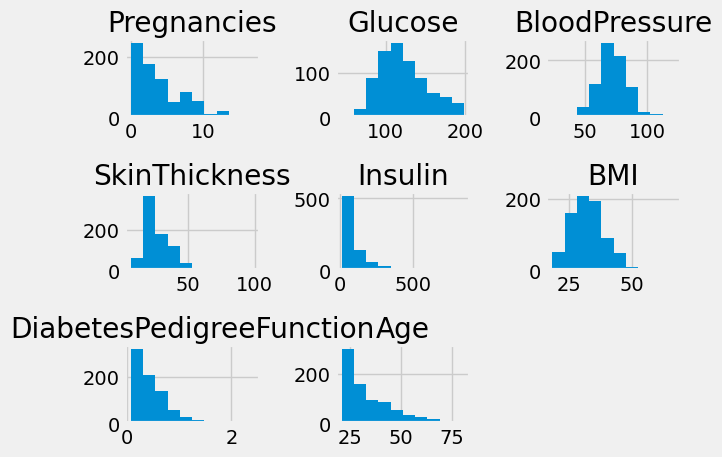

In [17]:
histograms(data)

In [18]:
# Lets do side by side histplot adn boxplots 
def histplot_boxplot(data, feature, figsize=(12,7), bins=None):
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios":(0.25, 0.75)},
    figsize=figsize )
    
    sns.boxplot(data=data, x=feature, showmeans=True, color="violet", ax=ax_box)
    sns.histplot(data=data, x=feature,pallete="winter", bins=bins, ax=ax_hist) if bins else sns.histplot(data=data,
                                                                     x=feature, ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), linestyle="--", color="green")
    ax_hist.axvline(data[feature].median(), linestyle="-", color="black")
    plt.show()

Pregnancies


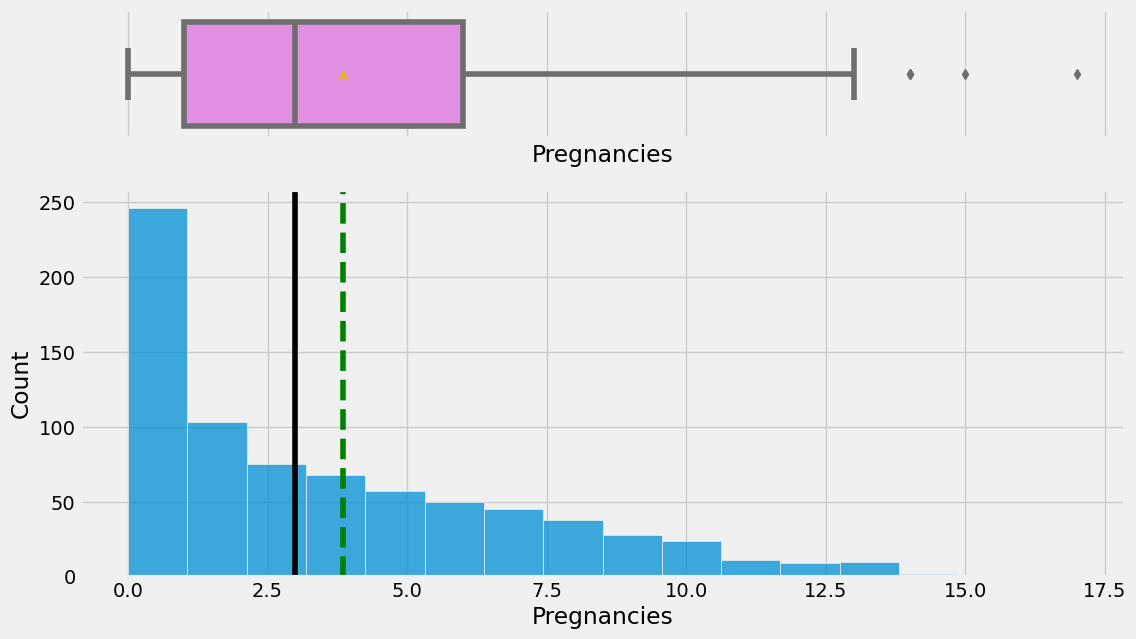

Glucose


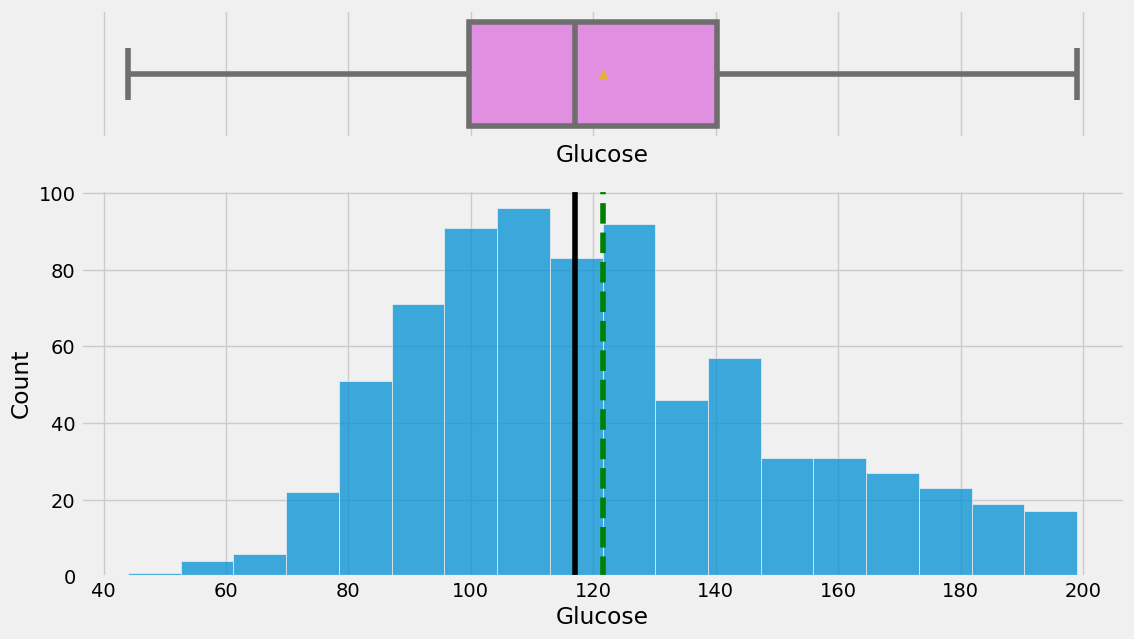

BloodPressure


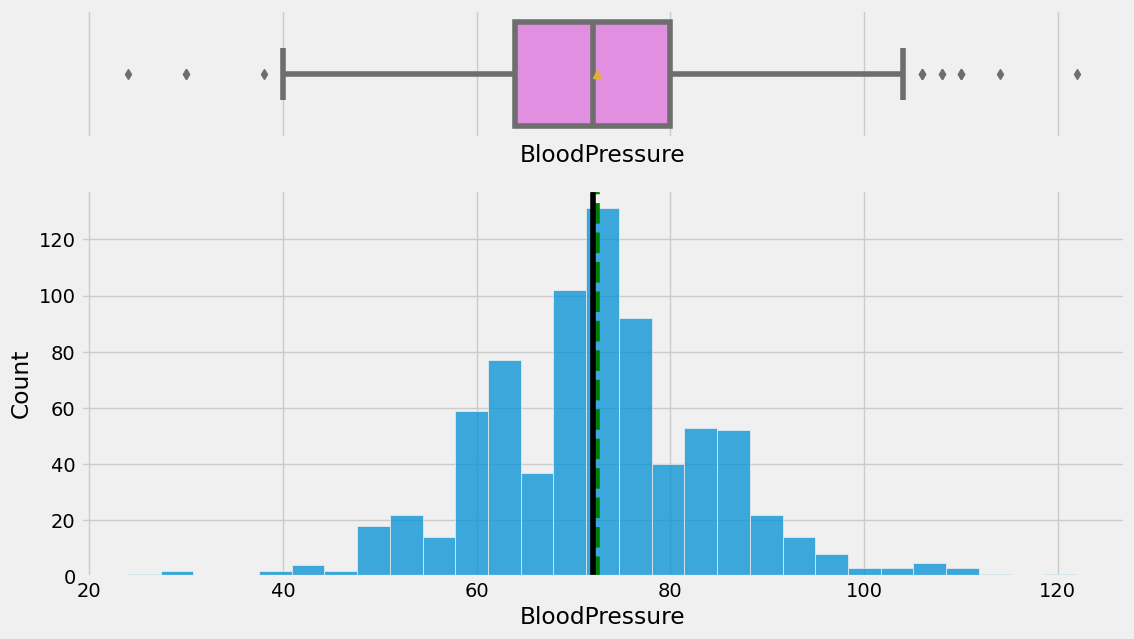

SkinThickness


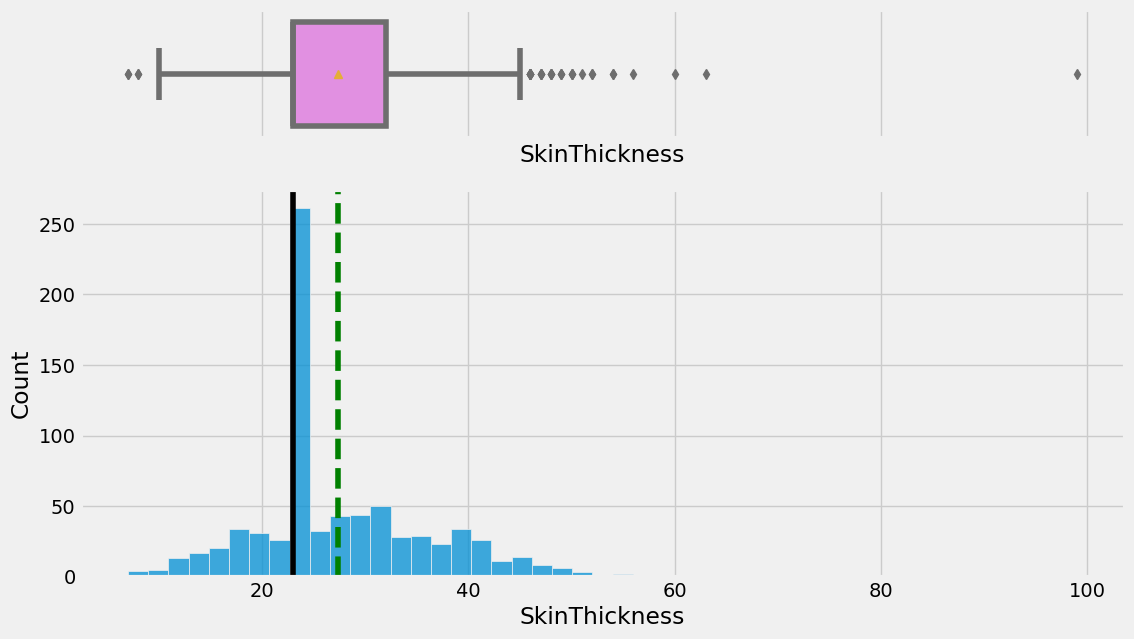

Insulin


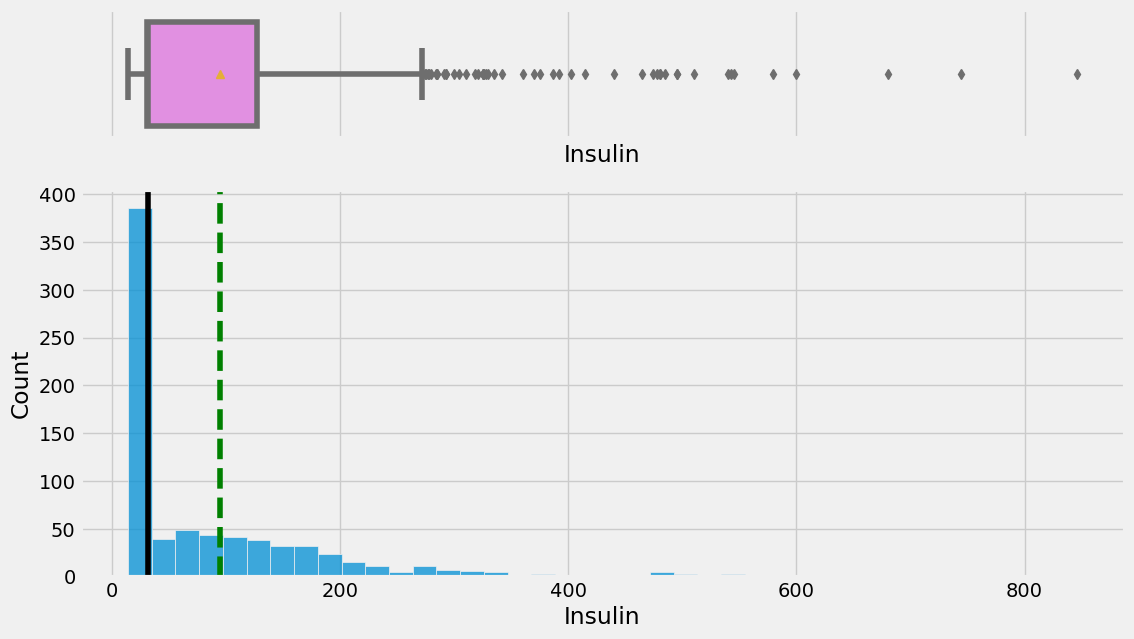

BMI


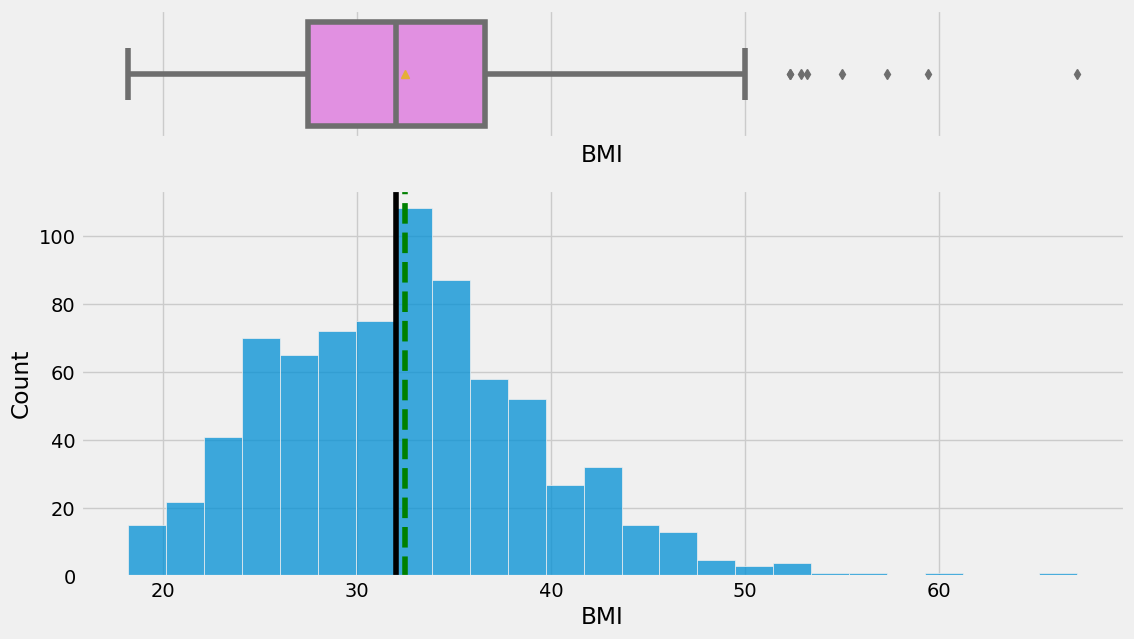

DiabetesPedigreeFunction


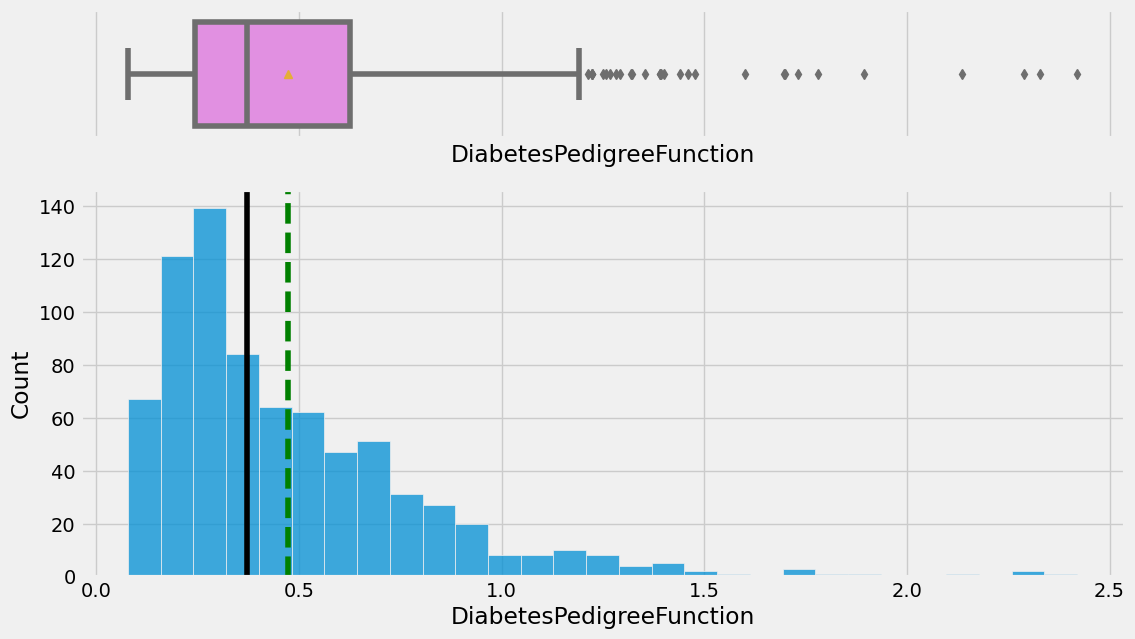

Age


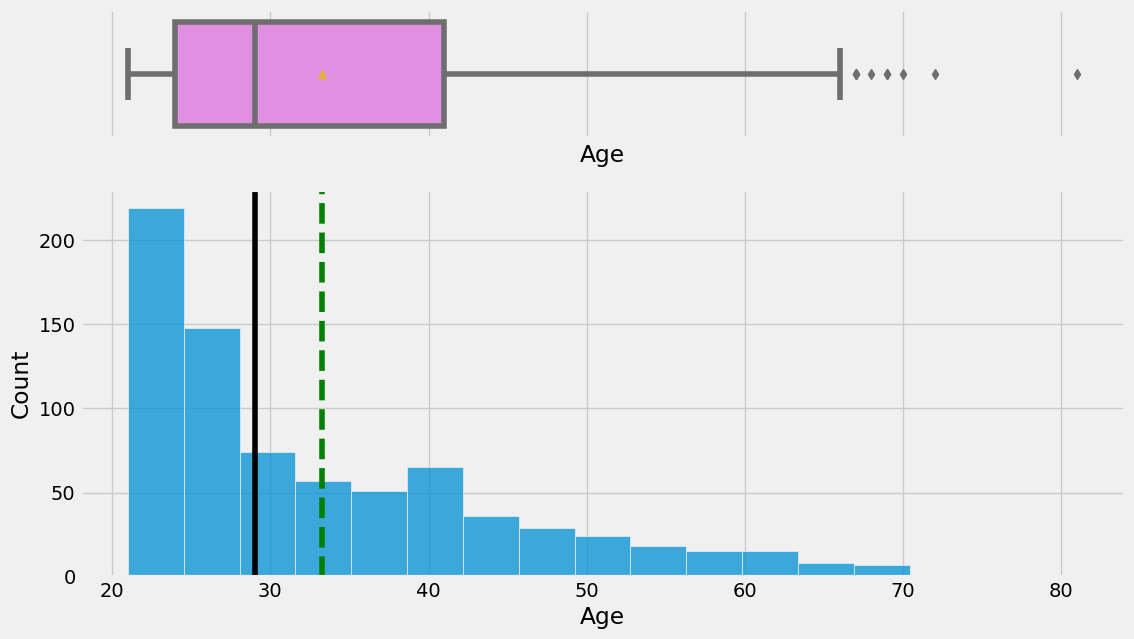

In [19]:
for col in data.select_dtypes(exclude="O").columns:
    print(col)
    histplot_boxplot(data=data, feature=col)
    plt.show()
    
    

Observations
1. Outliers- Preganancies, SkinThickness, Insulin , Diabetes Pedigree Function have lots of outliers we may need to cap the outer limit 
2. Skew- SkinThickness, Insulin , Diabetes Pedigree Function are highly right skewed and needs to be transformed using log or square root

In [20]:
# univariate Countplot
def countplot(data, feature):
    plt.figure(figsize=(12,7))
    ax=sns.countplot(data=data, x=feature, color="green")
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.3g}%".format(100.*y/len(data)), (x.mean(), y), ha="center", va="bottom")
    plt.show()

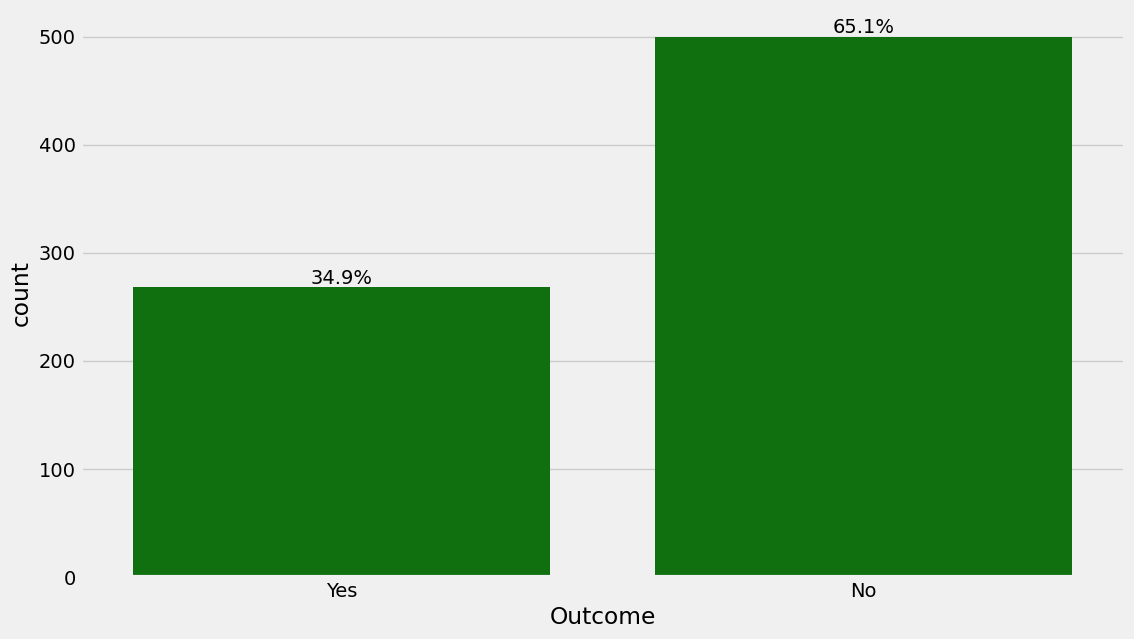

In [21]:
countplot(data=data,feature="Outcome")

The Outcome variable is not balanced. We would need for solve for data imbaalnce before modelling

In [22]:
# Bivariate -categorical vs numerical
def bivariate_barplot(data, feature1, feature2):
    data.groupby(feature1)[feature2].mean().plot(kind="bar", color="orange")
    plt.ylabel(col)
    plt.show()

In [23]:
import seaborn as sns

In [24]:
data.select_dtypes(include=object).columns

Index(['Outcome'], dtype='object')

Outcome vs  Pregnancies


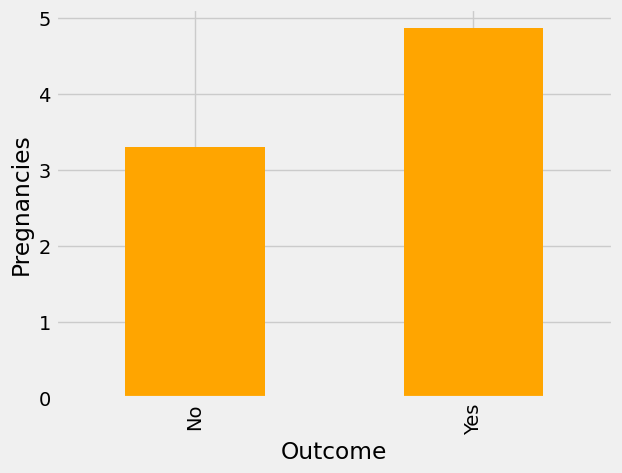

**************************************
Outcome vs  Glucose


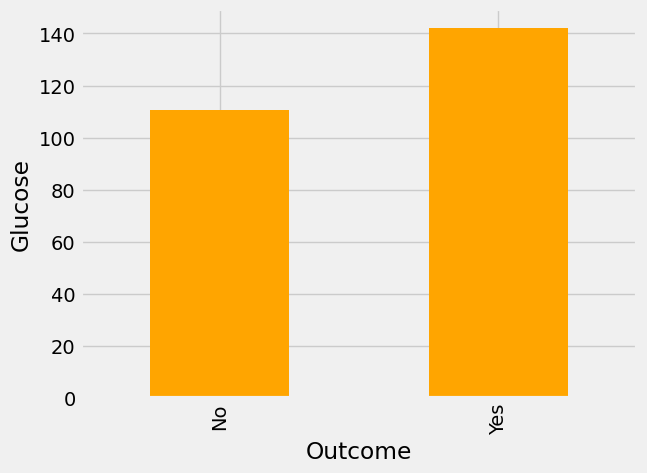

**************************************
Outcome vs  BloodPressure


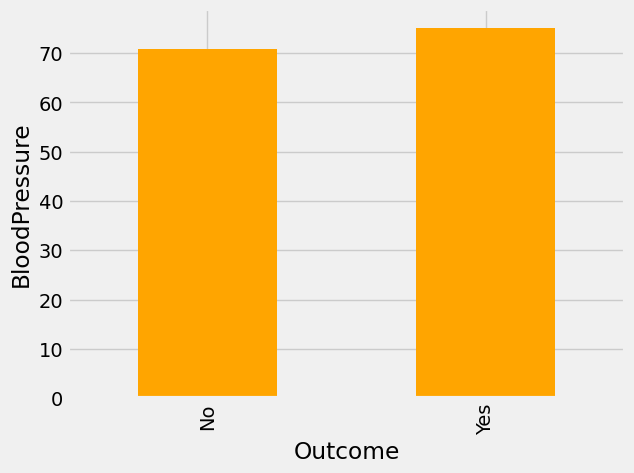

**************************************
Outcome vs  SkinThickness


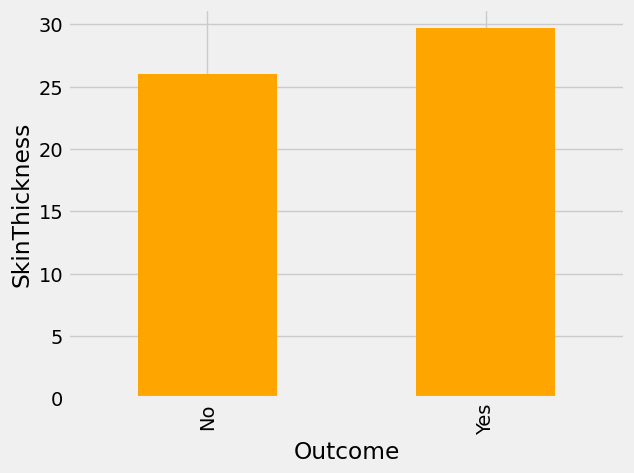

**************************************
Outcome vs  Insulin


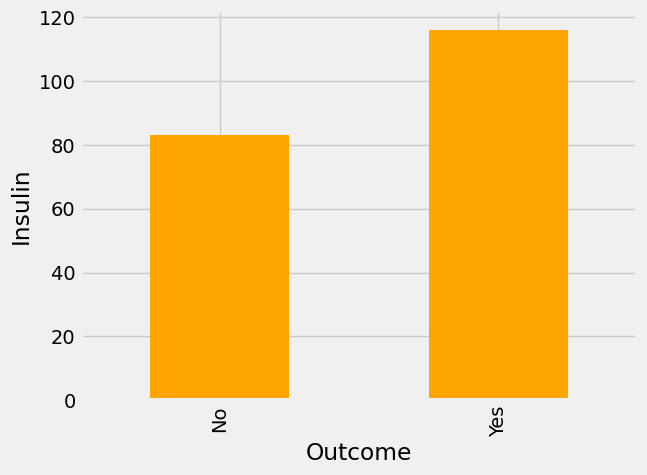

**************************************
Outcome vs  BMI


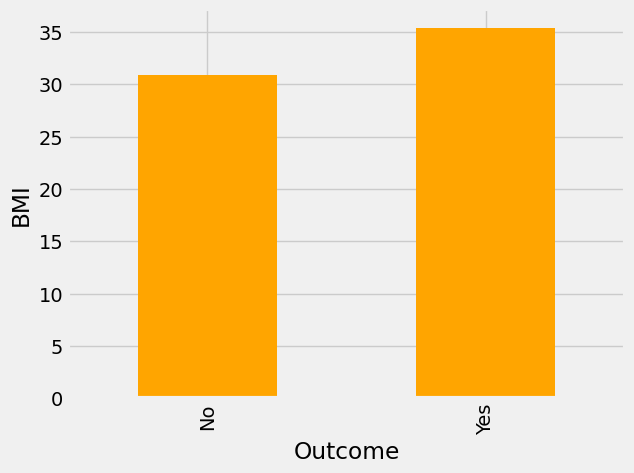

**************************************
Outcome vs  DiabetesPedigreeFunction


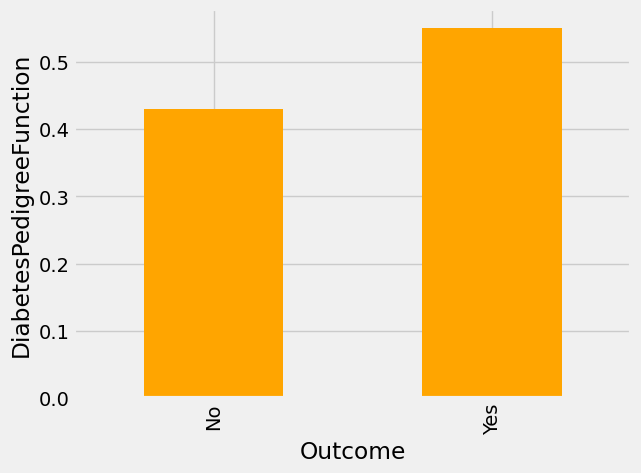

**************************************
Outcome vs  Age


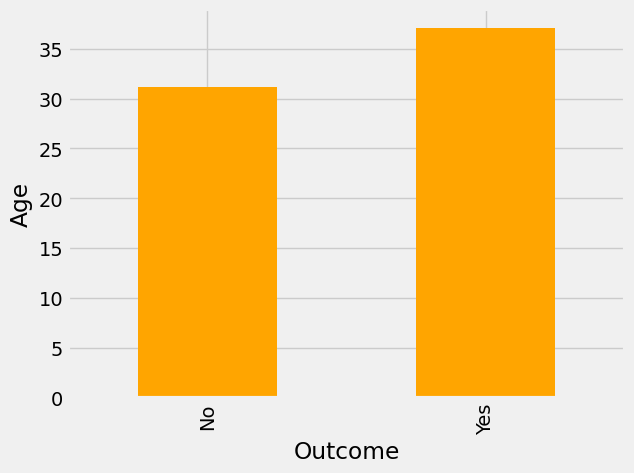

**************************************


In [25]:
for col in data.select_dtypes(exclude="O").columns:
    print("Outcome vs ", col)
    bivariate_barplot(data=data, feature1="Outcome",feature2= col)
    print("**************************************")

Those with higher Pregnancies, Glucose, Insulin, BMI and Age are more likely to be diabetic

In [26]:
# numericall vs numerical
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color="green")
    plt.title("Lineplotbetween {0} and {1}".format(feature1, feature2))
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color="orange", hue="Outcome")
    plt.title("Scatter Plot Between {0} and {1}".format(feature1, feature2))
    plt.show()

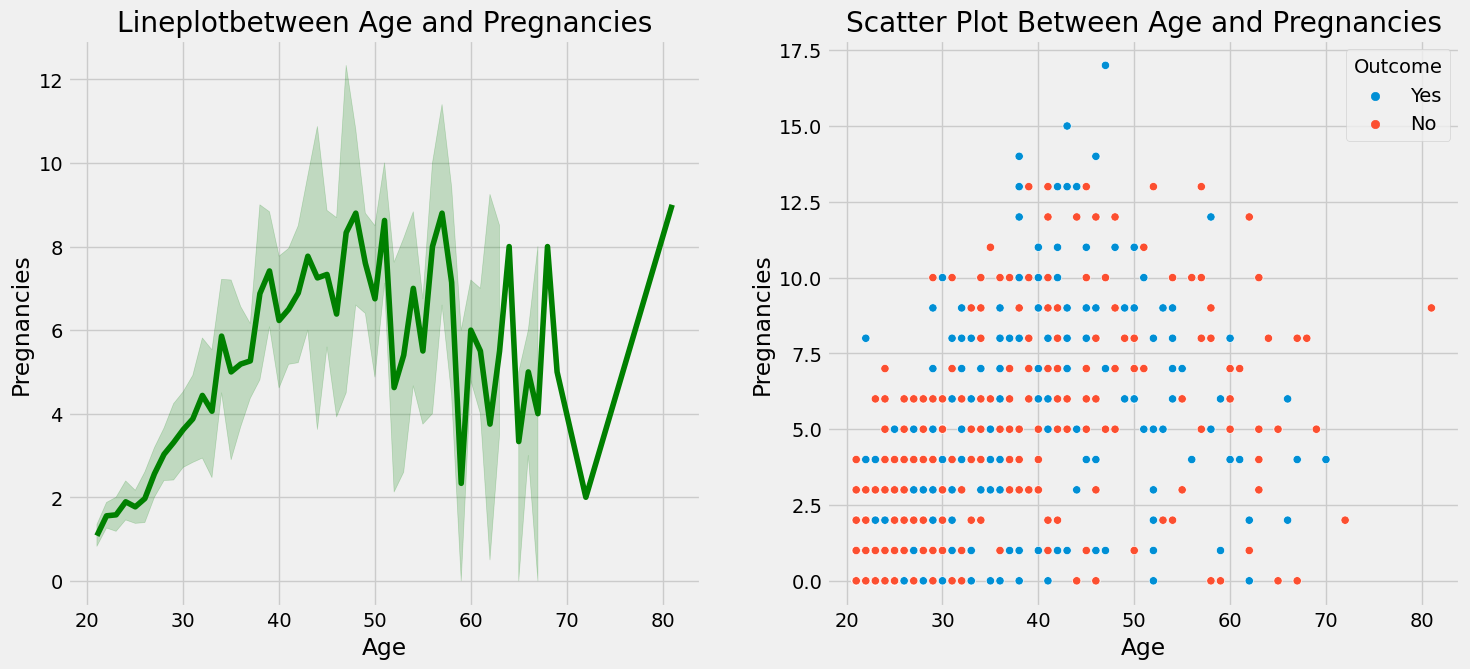

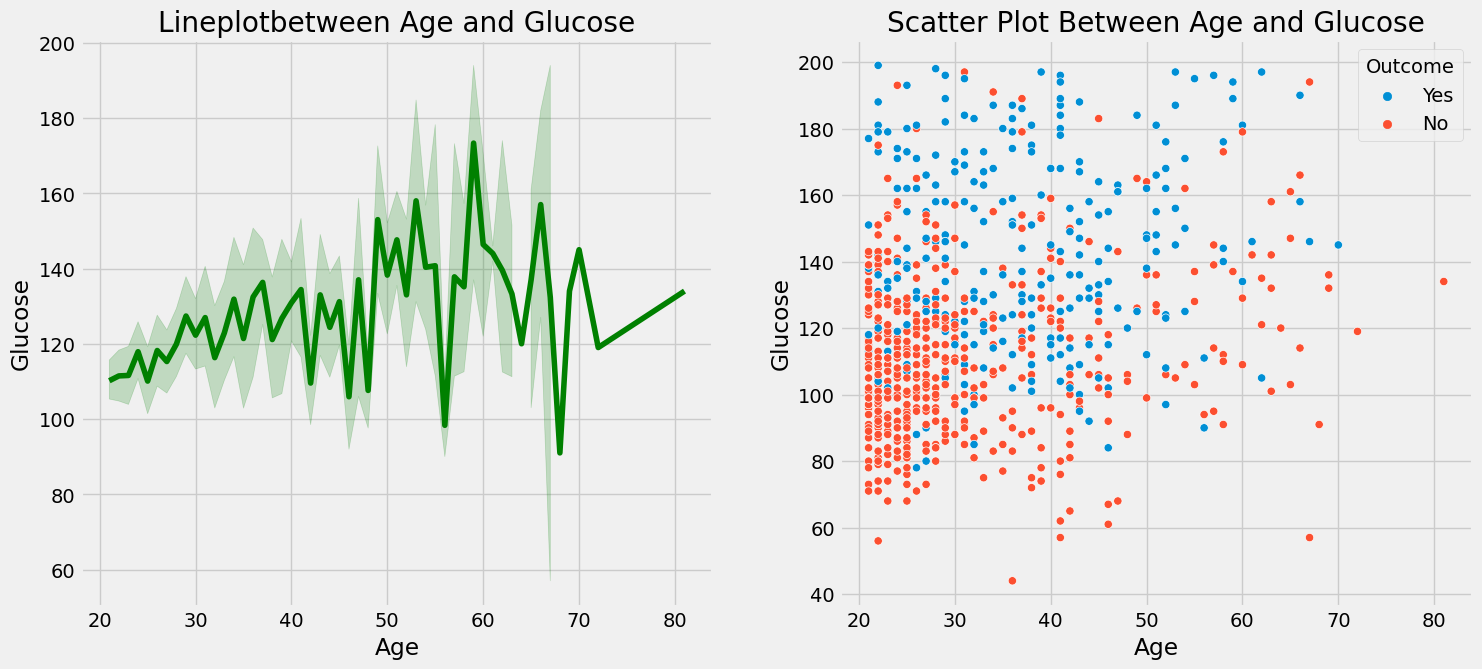

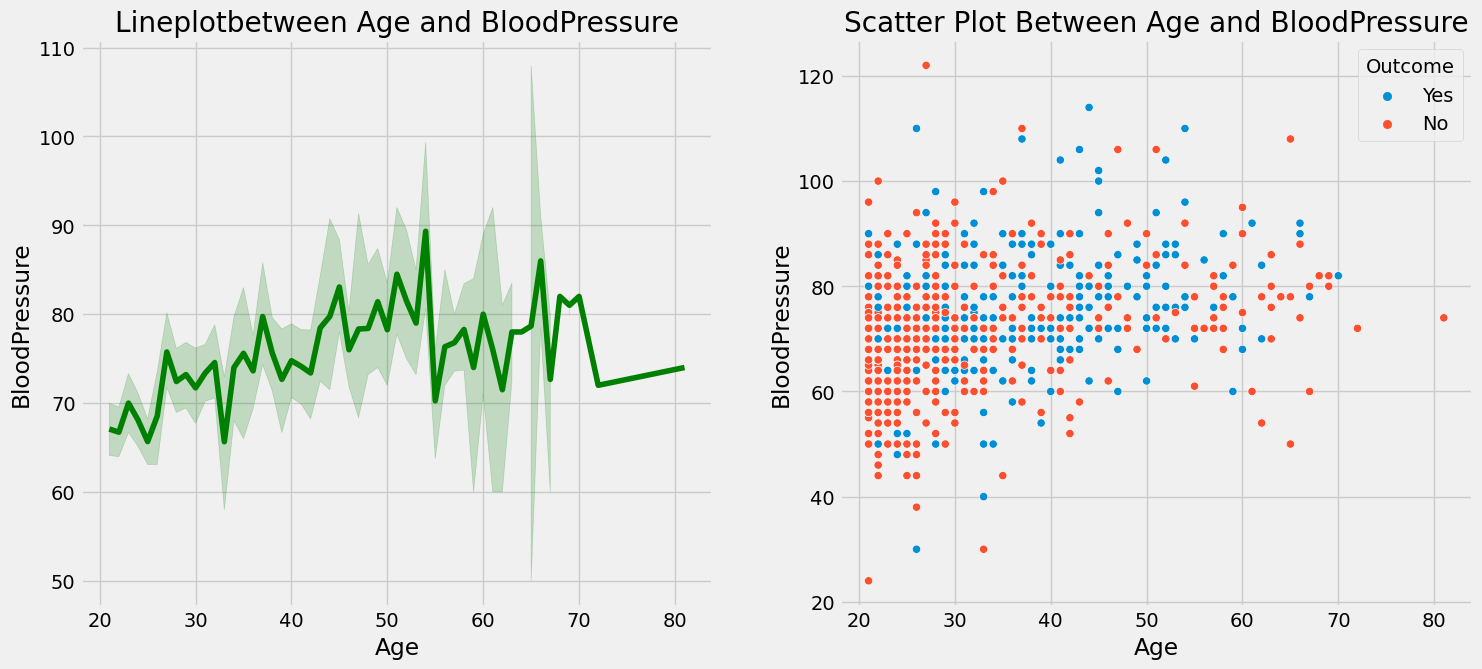

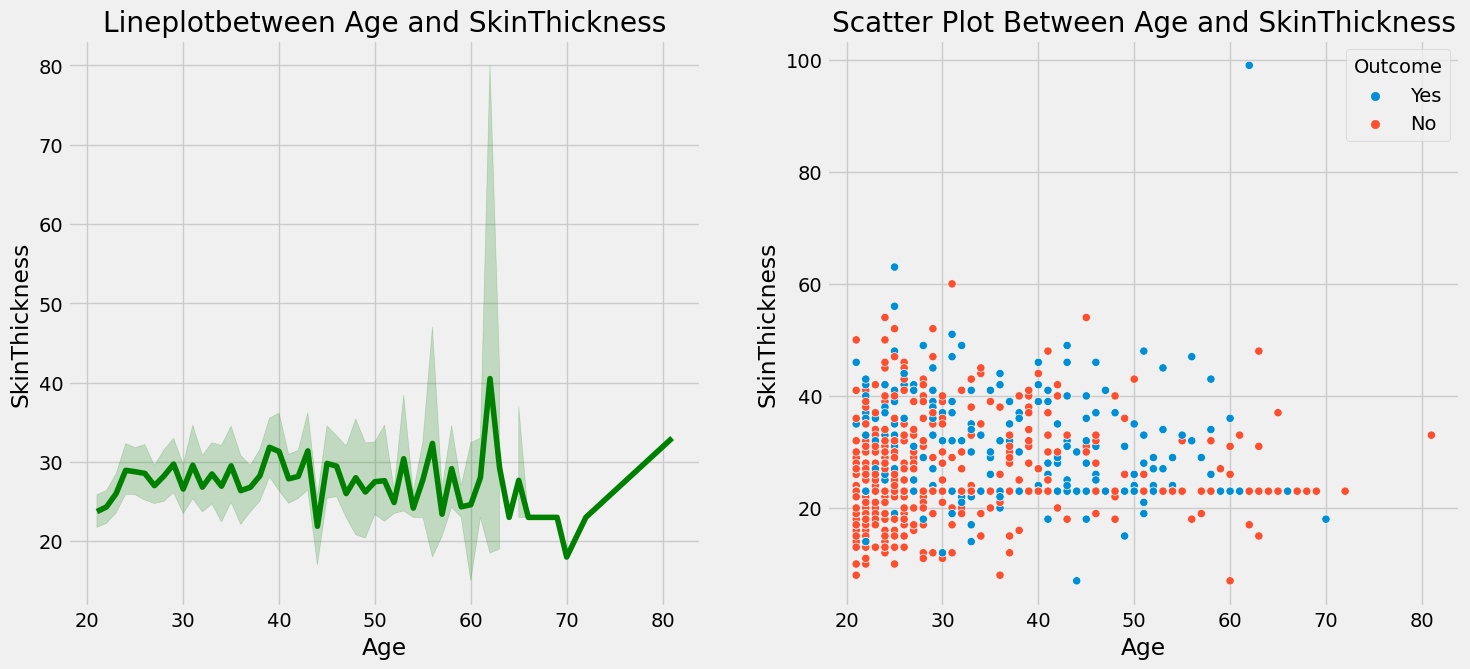

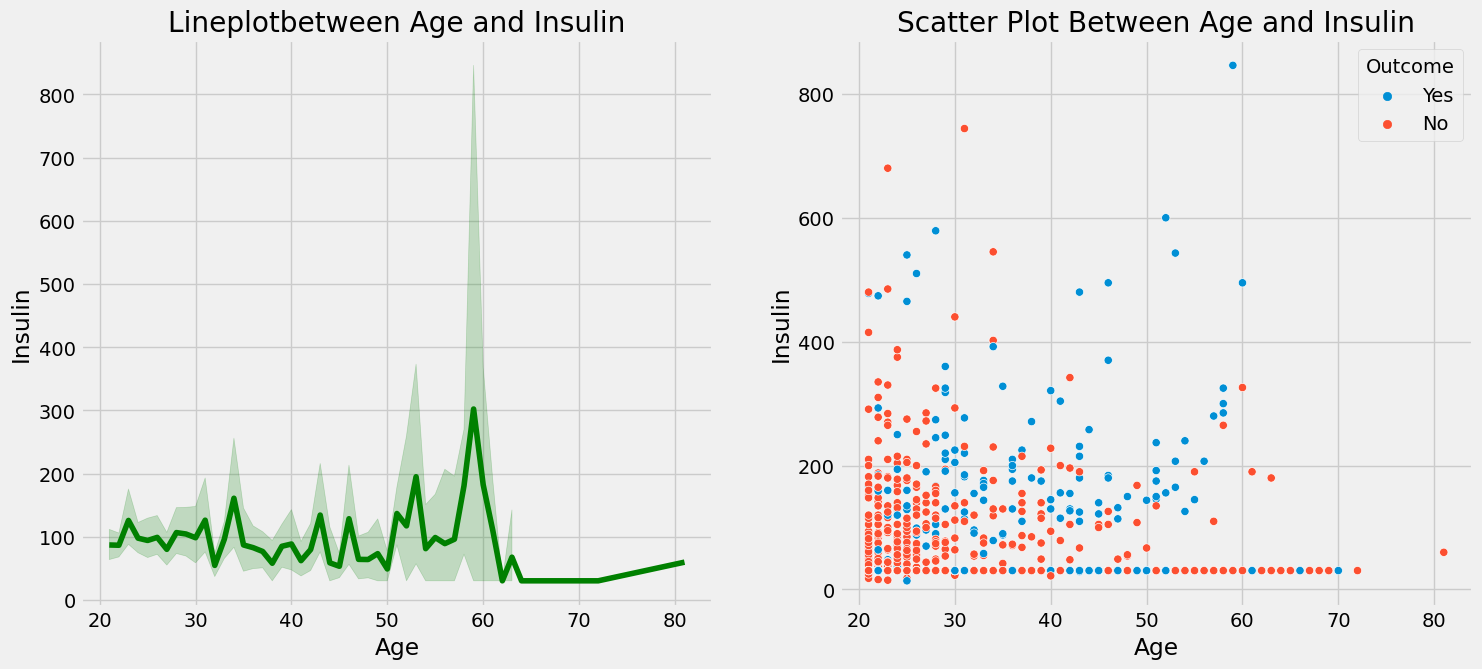

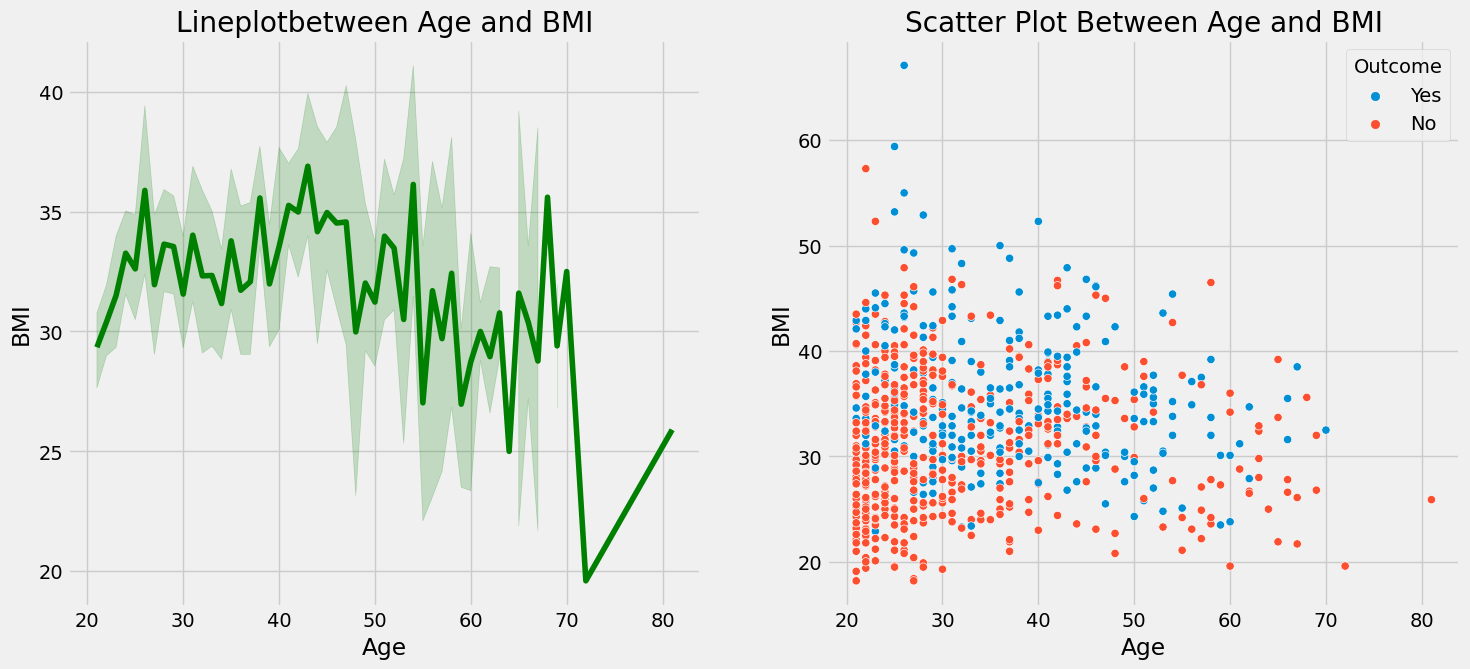

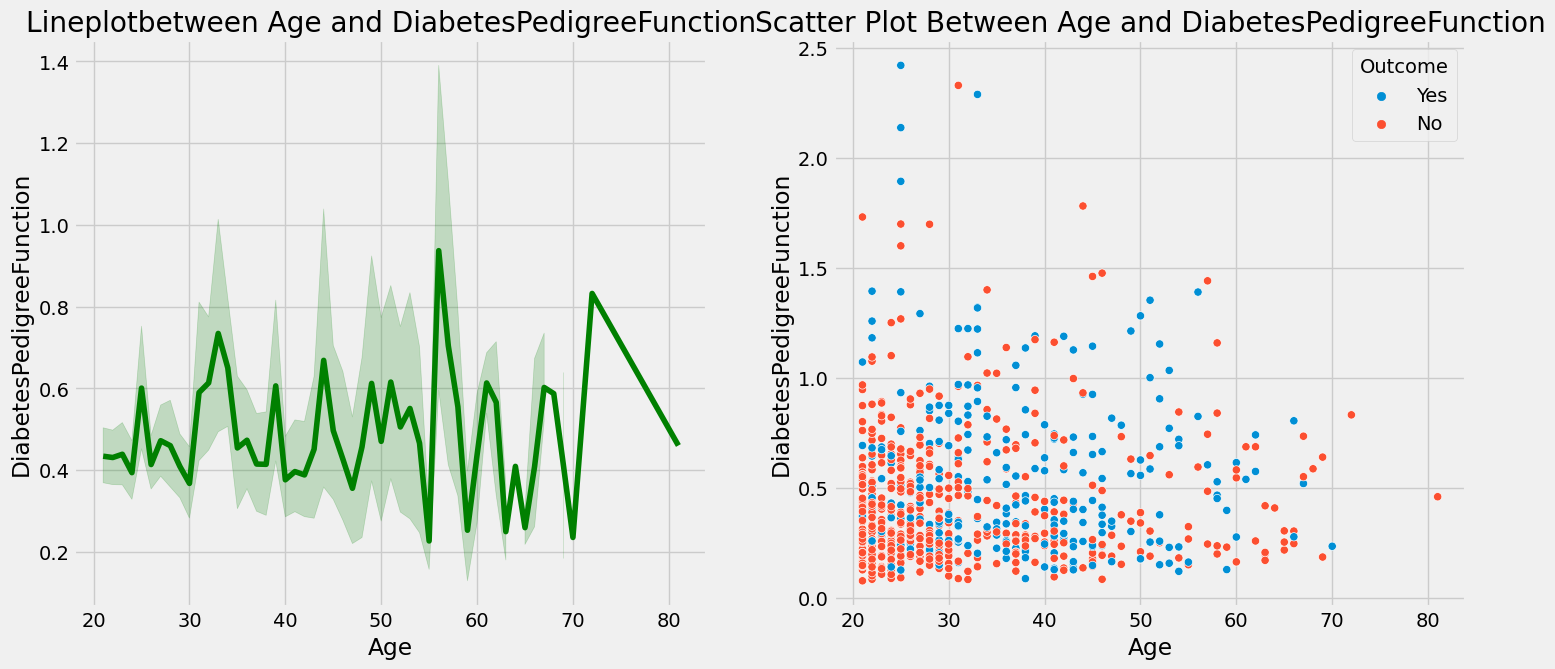

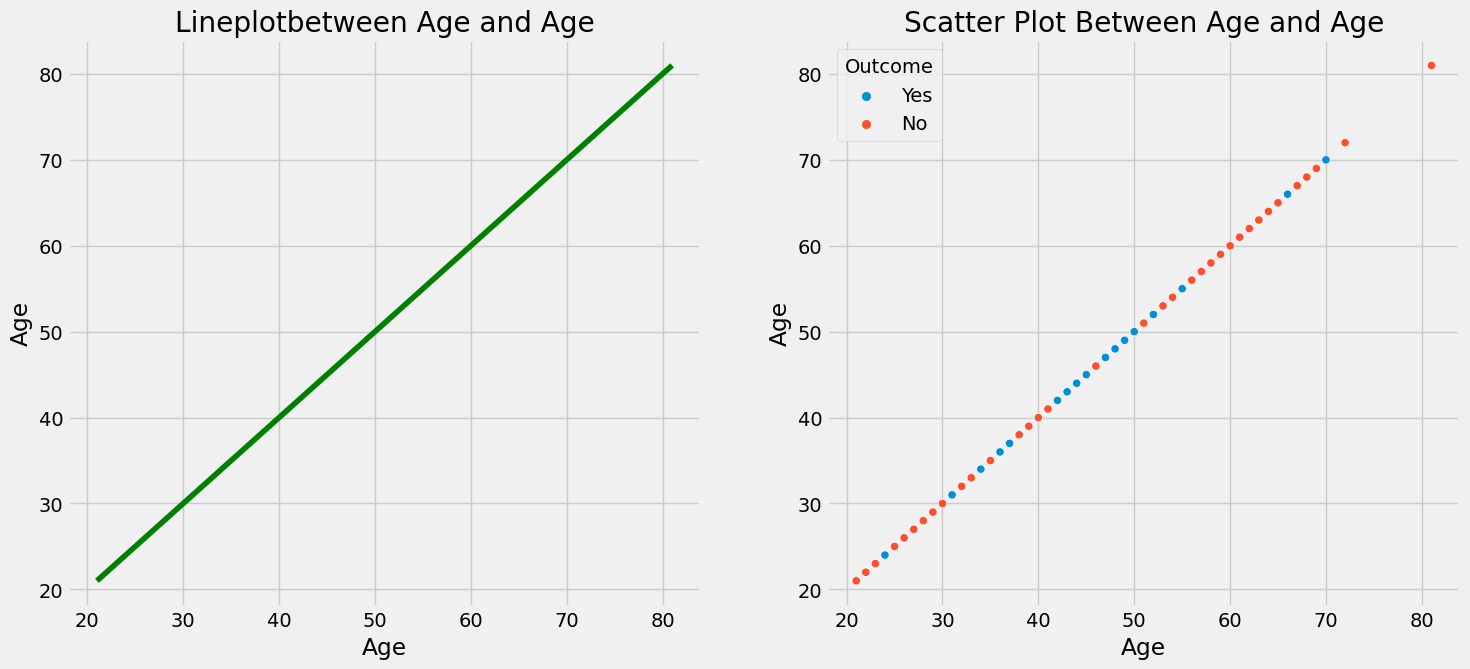

In [27]:
for col in data.select_dtypes(exclude="O").columns:
    lineplot_scatterplot(data=data, feature1="Age", feature2=col)
    
    

In [28]:
# create acorrelation matrix
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357573  0.231400                  0.137327   
BloodPressure            -0.028721  0.281132                 -0.002378   
SkinThickness             0.238188  0.546951                  0.142977   
Insulin                   1.000000  0.189022                  0.178029   
BMI                       0.189022  1.000000                  0.153506   
DiabetesPedigreeFunction  0.178029  0.153506                  1.000000   
Age                      -0.015413  0.025744                  0.033561   

                               Age  
Pregnancies               0.544341  
Glucose                   0.266909  
BloodPressure             0.324915  
SkinThickness             0.054514  
Insulin                  -0.015413  
BMI                       0.025744  
DiabetesPedigreeFunction  0.033561  
Age                       1.000000

In [29]:
df=data.copy()
d={"Yes":1, "No":0}
df["Outcome"]=df["Outcome"].map(d)

In [30]:
df[df.columns[:]].corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

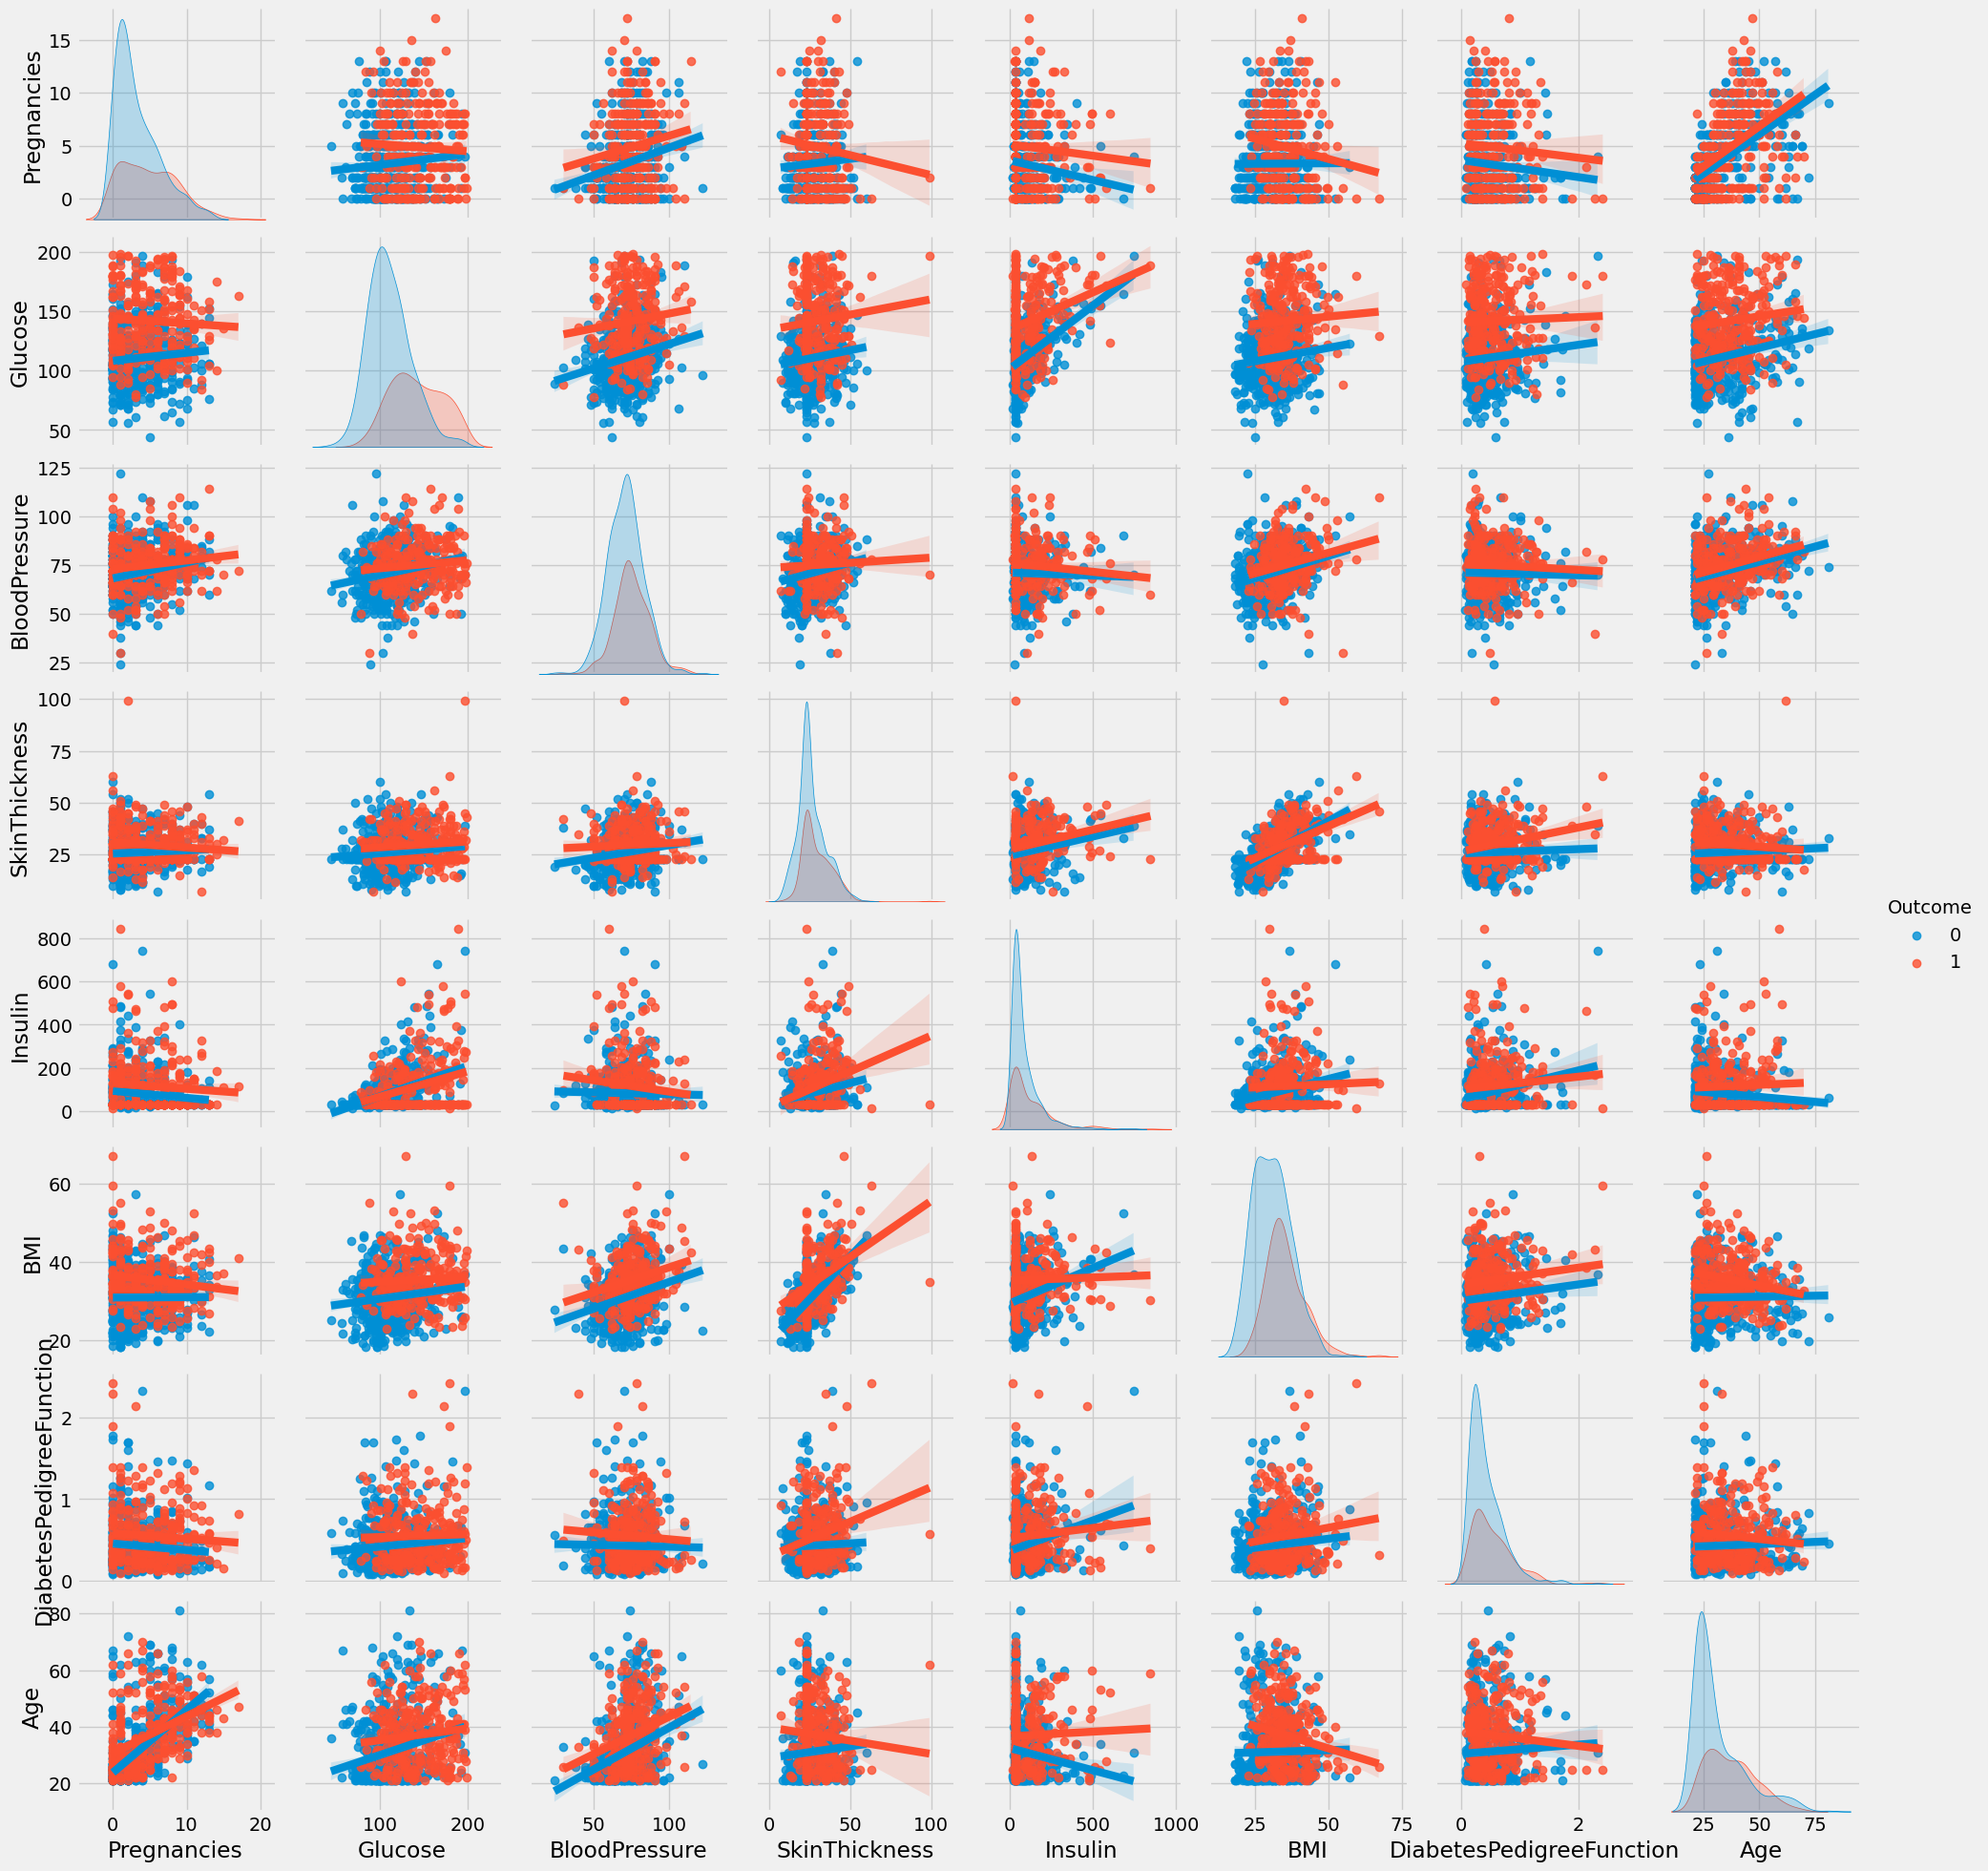

In [31]:
sns.pairplot(df, hue="Outcome", kind='reg')

<AxesSubplot:>

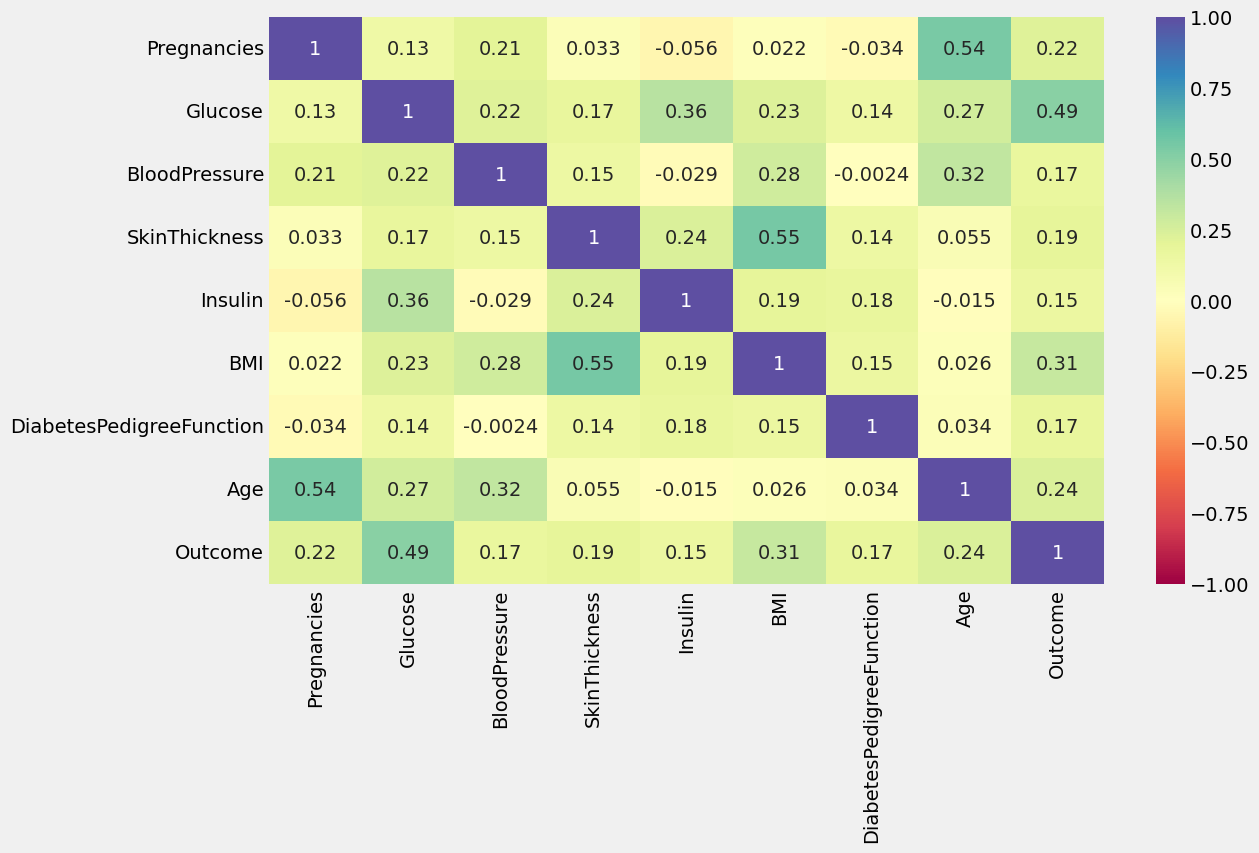

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=+1)

From the above graphs we can see that Glucose, Age and BMI are the strongest predictors of Diabetes

# To be continued..

### ***Preprocessing***
1. Seperate the features and label
2. Labels encoding of features
3. Num value imputation
4. Solving data imbalance
5. Train test split
6. Feature selection

In [33]:
def preproscessing(data,label):
    x=data.drop(label,axis=1)
    y=data[label]
    sm=SMOTE()
    x,y=sm.fit_resample(x,y)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)
    return x_train,x_test,y_train,y_test

In [34]:
x_train,x_test,y_train,y_test = preproscessing(df,label='Outcome')
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [35]:
# The data is ready for modelling 

# Modelling and Evaluation 

In [36]:
def print_metrics(y_test, y_pred , model_name):
    print("Metrics for the model ", model_name)
    print("")
    print("Accuracy Score = ", accuracy_score(y_test,y_pred))
    print("")
    print("Precision Score = ", precision_score(y_test,y_pred))
    print("")
    print("Recall Score = ", recall_score(y_test,y_pred))
    print("")
    print("F1 Score = ", f1_score(y_test,y_pred))
    print("")
    print("ROC Score = ", roc_auc_score(y_test,y_pred))
    

In [37]:
def plot_metrics(clf, x_train, x_test, model_name):
    print("Model Evaluation plots")
    plot_confusion_matrix(clf, x_train, x_test,display_labels=[0,1])
    plot_roc_curve(clf, x_train, x_test) #balanced data
    plot_precision_recall_curve(clf, x_train, x_test) #imbalanced data
    

In [38]:
#fit and evaluate the knn model
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print_metrics(y_test, y_pred, "KNN")

Metrics for the model  KNN

Accuracy Score =  0.815

Precision Score =  0.8165137614678899

Recall Score =  0.839622641509434

F1 Score =  0.827906976744186

ROC Score =  0.8134283420313128


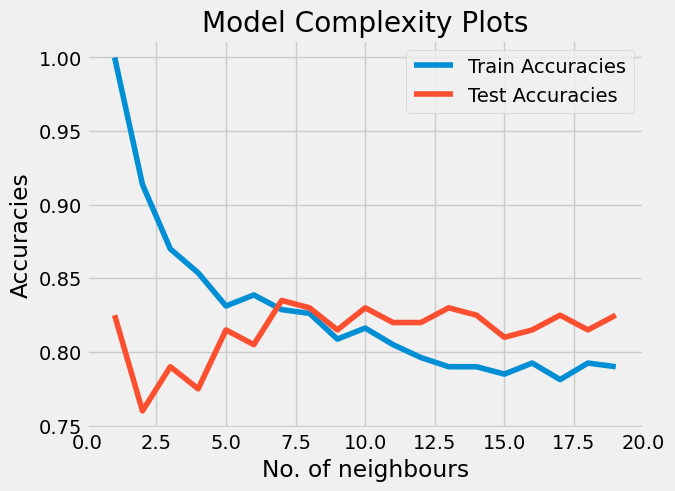

In [39]:
# Optimize k using a model complexity curve
neighbours = np.arange(1,20)
train_accuracies = np.empty(len(neighbours))
test_accuracies = np.empty(len(neighbours))

# Enumerate over neighbourse and fit 20 models 
for i, k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracies[i]=knn.score(x_train,y_train)
    test_accuracies[i]=knn.score(x_test,y_test)
    
# plot these accuracies in a model complexity plot 
plt.plot(neighbours, train_accuracies, label="Train Accuracies")
plt.plot(neighbours, test_accuracies, label="Test Accuracies")
plt.legend()
plt.xlim(0,20,1)
plt.title("Model Complexity Plots")
plt.xlabel("No. of neighbours")
plt.ylabel("Accuracies")
plt.show()

In [40]:
# Fit and evaluate all models (vanilla models : need no hyper parameter)

clfs = {
    "logreg": LogisticRegression(),
    "naive_bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC() #Support vector classifier
}

models_report = pd.DataFrame(columns=['model_name', 'accuracy','recall','precision','f1-score'])

for clf, clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    #print("fitting classifier .... ",clf_name)
    t = pd.Series({
        'model_name': clf_name,
        'accuracy': accuracy_score(y_test,y_pred),
        'recall':recall_score(y_test,y_pred),
        'precision': precision_score(y_test,y_pred),
        'f1-score':f1_score(y_test,y_pred)        
    })
    
    models_report = models_report.append(t,ignore_index=True)

models_report = models_report.sort_values(by = 'f1-score', ascending = False)
models_report

model_name  accuracy    recall  precision  f1-score
4      RandomForest     0.880  0.867925   0.901961  0.884615
7           XGBoost     0.845  0.867925   0.844037  0.855814
8               SVM     0.850  0.830189   0.880000  0.854369
6  GradientBoosting     0.845  0.830189   0.871287  0.850242
2               KNN     0.815  0.839623   0.816514  0.827907
3      DecisionTree     0.795  0.783019   0.821782  0.801932
0            logreg     0.780  0.716981   0.844444  0.775510
5          AdaBoost     0.760  0.745283   0.790000  0.766990
1       naive_bayes     0.745  0.650943   0.831325  0.730159

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print_metrics(y_test,y_pred,'RFC')

# OPTIMIZING THE MODEL

In [44]:
# lets optimize the best performance vanilla model - Random Forest 

param_grids={
    'n_estimators':[100,150,200,250,300],
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,10,2),
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt','log2'],
    'criterion': ['gini','entropy']}

n_folds = 3
cv = GridSearchCV(estimator=RandomForestClassifier(),
                 param_grid=param_grids, 
                 cv = n_folds,
                 n_jobs=1,
                 verbose=5,
                 return_train_score=False,
                 scoring='f1')

In [45]:
cv.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.761 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.784 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.748 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.746 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.783 total time=   0.3s
[CV 1/3] END criterion=

[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=0.744 total time=   0.9s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=0.734 total time=   0.7s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=0.791 total time=   0.6s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.764 total time=   0.8s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.733 total time=   0.8s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.782 total time=   0.8s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_sam

[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.765 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.738 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.775 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.751 total time=   0.5s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.734 total time=   0.5s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.783 total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_sam

[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=0.785 total time=   1.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=0.736 total time=   0.8s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=0.789 total time=   0.8s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.743 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.728 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.757 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_sam

[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.773 total time=   0.6s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.721 total time=   0.7s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.804 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.756 total time=   0.6s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.740 total time=   0.8s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.794 total time=   0.7s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_sam

[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.769 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.738 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.794 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=0.747 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=0.738 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=0.781 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=1, min_sam

[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.762 total time=   0.7s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.708 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.787 total time=   0.7s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.749 total time=   1.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.734 total time=   0.9s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.775 total time=   0.8s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_sam

[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=150;, score=0.764 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=150;, score=0.738 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=150;, score=0.791 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.774 total time=   0.5s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.729 total time=   0.5s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.778 total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=3, min_sam

[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.756 total time=   0.8s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.725 total time=   0.8s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.789 total time=   0.9s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.774 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.680 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.787 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=4, min_sam

[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.779 total time=   0.5s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.753 total time=   0.6s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.803 total time=   0.5s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.771 total time=   1.1s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.742 total time=   1.8s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.800 total time=   0.7s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_sam

[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.777 total time=   0.6s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.723 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.790 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.754 total time=   0.5s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.741 total time=   0.7s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.790 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_sam

[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.765 total time=   1.2s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.745 total time=   1.1s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.809 total time=   1.2s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.776 total time=   1.5s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.749 total time=   1.6s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.799 total time=   1.5s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_sam

[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.765 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.753 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.788 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.774 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.749 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.791 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_sam

[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.764 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.744 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.807 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.760 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.750 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.803 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_sam

[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.785 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.757 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.799 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.775 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.736 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.810 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_sam

[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.753 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.797 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.762 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.807 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.766 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_sam

[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.734 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.810 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=0.775 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=0.743 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=0.803 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=0.771 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=3, min_sam

[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.794 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.769 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.756 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.804 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=250;, score=0.769 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=250;, score=0.741 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_sam

[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.814 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.786 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.768 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.813 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.779 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.752 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_sam

[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.807 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.766 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.757 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.820 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.760 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.750 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_sam

[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=0.780 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=0.757 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=0.804 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.750 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=0.803 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_sam

[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.770 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.743 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.811 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.761 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.797 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_sam

[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.758 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.803 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=250;, score=0.766 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=250;, score=0.744 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=250;, score=0.817 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_sam

[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=0.752 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=100;, score=0.812 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=0.777 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=0.762 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=150;, score=0.812 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.774 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_sam

[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=0.753 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=0.812 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300;, score=0.774 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300;, score=0.764 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=300;, score=0.814 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=0.776 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_sam

[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=0.748 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=0.807 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.782 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.762 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=0.806 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=250;, score=0.782 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_sam

[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=300;, score=0.755 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=300;, score=0.811 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.773 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.765 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=100;, score=0.804 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_sam

[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=0.814 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=250;, score=0.789 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=250;, score=0.769 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=250;, score=0.817 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=0.775 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_sam

[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.752 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100;, score=0.814 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=150;, score=0.789 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=150;, score=0.761 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=150;, score=0.814 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.783 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_sam

[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=250;, score=0.745 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=250;, score=0.821 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.782 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.763 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=0.823 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.777 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_sam

[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.763 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.813 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.773 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.760 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.817 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=250;, score=0.770 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_sam

[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300;, score=0.760 total time=   0.7s
[CV 3/3] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=300;, score=0.820 total time=   1.0s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.776 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.769 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.825 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.787 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_sam

[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.762 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=200;, score=0.830 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=0.771 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=0.776 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=0.829 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.784 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_sam

[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=0.763 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=0.820 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.784 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.759 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=150;, score=0.830 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.792 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_sam

[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=250;, score=0.773 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=250;, score=0.820 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=0.780 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=0.756 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=0.823 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.781 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_sam

[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=150;, score=0.829 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.784 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.760 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.822 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.776 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.784 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_sam

[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=300;, score=0.813 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.773 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.768 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100;, score=0.827 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=0.789 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=0.766 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_sam

[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.819 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.786 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.759 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.826 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.783 total time=   0.5s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.760 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_sam

[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150;, score=0.776 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150;, score=0.759 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150;, score=0.822 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.782 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.772 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.820 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_sam

[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.784 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.774 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.819 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.780 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.767 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.819 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_sam

[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.772 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.819 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.786 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.770 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.827 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_sam

[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.766 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.835 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.786 total time=   0.4s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.765 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.820 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.786 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_sam

[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.768 total time=   0.3s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.823 total time=   0.3s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.771 total time=   0.7s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.770 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.830 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.770 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_sam

[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.780 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.830 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.789 total time=   0.2s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.776 total time=   0.2s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.824 total time=   0.2s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.777 total time=   0.3s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_sam

[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.764 total time=   0.4s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.806 total time=   0.4s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.787 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.768 total time=   0.1s
[CV 3/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.821 total time=   0.1s
[CV 1/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=0.773 total time=   0.1s
[CV 2/3] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_sam

[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.751 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.779 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.760 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.740 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.804 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300;, score=0.774 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_sa

[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.745 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.807 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.757 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.746 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.786 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.760 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_sa

[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.769 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.738 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.780 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=0.743 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=0.740 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=0.800 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_sa

[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.742 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.729 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.778 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.776 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.729 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.794 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=sqrt, min_sa

[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.799 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.766 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.736 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.794 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.754 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.731 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_sa

[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.801 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.773 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.736 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.799 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.785 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.740 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.738 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.801 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.757 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.734 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.803 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=0.770 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_sa

[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.755 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.738 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.786 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.754 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.726 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.796 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_sa

[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.803 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.755 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.743 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.796 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=0.752 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=1, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=0.740 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=1, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.731 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.797 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.773 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.738 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.793 total time=   0.5s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=300;, score=0.767 total time=   0.5s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.748 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.794 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.776 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.742 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.804 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200;, score=0.775 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.761 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.747 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.806 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=0.769 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=0.754 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=0.800 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.761 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.742 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.810 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.762 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.748 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.809 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=sqrt, min_sa

[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.807 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.767 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.748 total time=   0.4s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.810 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.756 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.741 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.742 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.810 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.756 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.756 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.810 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=250;, score=0.758 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.759 total time=   0.5s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.750 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.807 total time=   0.5s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.745 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.803 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.809 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.774 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.737 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.809 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.758 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.743 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.740 total time=   0.4s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.804 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.763 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.758 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.813 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=150;, score=0.764 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, min_sa

[CV 1/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.771 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.764 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.804 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.746 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.747 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.819 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_sa

[CV 3/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.810 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.756 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.746 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.803 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.767 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=150;, score=0.750 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_sa

[CV 2/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.751 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.817 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.754 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.769 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.811 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=300;, score=0.761 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_sa

[CV 2/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.761 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.820 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.744 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.762 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.819 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200;, score=0.754 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=sqrt, min_sa

[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.762 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.758 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.816 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.763 total time=   0.5s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.770 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.807 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_sa

[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.806 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.766 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.760 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.814 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.763 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.750 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.755 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.814 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.786 total time=   0.5s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.752 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.819 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.767 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_sa

[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.770 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.779 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.809 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.770 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.760 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.804 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_sa

[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.810 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.777 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.761 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.816 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.758 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.758 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=3, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=0.784 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=0.817 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.773 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.774 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.819 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=250;, score=0.761 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.769 total time=   0.5s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.769 total time=   0.4s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.823 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.762 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.753 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.810 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150;, score=0.816 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.781 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.772 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.819 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.776 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.760 total time=   0.4s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.766 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.813 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.762 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.764 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.801 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=150;, score=0.767 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=sqrt, min_sa

[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.786 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.787 total time=   0.4s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.826 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.766 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.778 total time=   0.4s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.832 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.823 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.776 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.813 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.771 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.776 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.759 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.817 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.773 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.772 total time=   0.4s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.829 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=300;, score=0.760 total time=   0.5s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.781 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.824 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.774 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.773 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.822 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.769 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.777 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.778 total time=   0.4s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.826 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.775 total time=   0.5s
[CV 2/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.770 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.821 total time=   0.5s
[CV 1/3] END criterion=entropy, max_depth=4, max_features=log2, min_sa

[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=0.762 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=0.782 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=150;, score=0.821 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.776 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.778 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=0.813 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_sa

[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=250;, score=0.821 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.790 total time=   0.7s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.799 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.811 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.786 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=0.778 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_sa

[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150;, score=0.769 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=150;, score=0.810 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.789 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.764 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=200;, score=0.820 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=250;, score=0.783 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_sa

[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.780 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.781 total time=   0.5s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.814 total time=   0.5s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.768 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.784 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100;, score=0.812 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=sqrt, min_sa

[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.819 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.773 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.776 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.819 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.770 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=250;, score=0.778 total time=   0.4s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.779 total time=   0.4s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=300;, score=0.814 total time=   0.4s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.787 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.760 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.823 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.775 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_sa

[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.780 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.778 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200;, score=0.824 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.775 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.781 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=250;, score=0.810 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_sa

[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=300;, score=0.821 total time=   0.5s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.786 total time=   0.1s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.776 total time=   0.1s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.816 total time=   0.1s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.773 total time=   0.2s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=150;, score=0.773 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_sa

[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.780 total time=   0.2s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200;, score=0.821 total time=   0.2s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.766 total time=   0.3s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.777 total time=   0.3s
[CV 3/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=250;, score=0.816 total time=   0.3s
[CV 1/3] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=300;, score=0.773 total time=   0.4s
[CV 2/3] END criterion=entropy, max_depth=5, max_features=log2, min_sa

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='f1', verbose=5)

In [47]:
cv.best_score_

0.8002301959532062

In [50]:
cv.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=3,
                       n_estimators=250)

In [58]:
rfc_tuned = cv.best_estimator_
rfc_tuned.fit(x_train, y_train)
y_pred = rfc_tuned.predict(x_test)
print_metrics(y_test,y_pred,"RFC Tuned")

Metrics for the model  RFC Tuned

Accuracy Score =  0.85

Precision Score =  0.8653846153846154

Recall Score =  0.8490566037735849

F1 Score =  0.8571428571428571

ROC Score =  0.8500602167804095


# Interpreting the model 

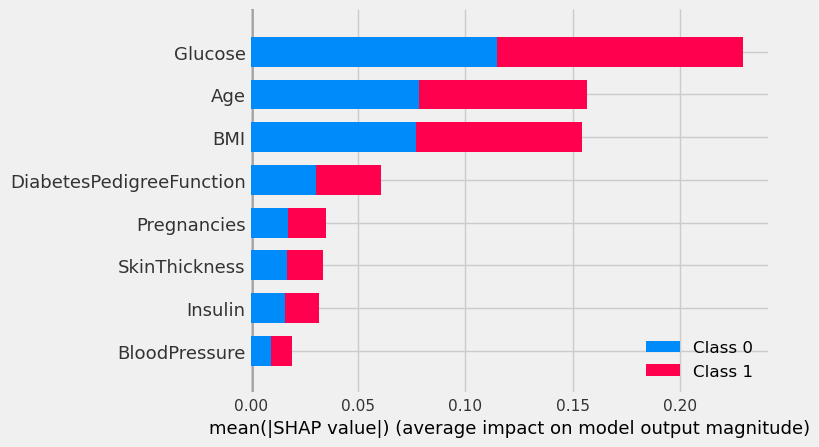

In [59]:
import shap
X = df.drop("Outcome",axis=1)
value=shap.TreeExplainer(rfc_tuned).shap_values(x_test)
shap.summary_plot(value, x_train, plot_type = 'bar', feature_names=X.columns)

# Creating the model pipeline

In [61]:
from sklearn.pipeline import Pipeline
sc = StandardScaler()
rfc_tuned = rfc_tuned 
steps = [('scaler', sc), ("RFC tuned", rfc_tuned)]
pipeline = Pipeline(steps)
x_train,x_test,y_train,y_test = preproscessing(df,label = 'Outcome')
pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
print_metrics(y_test, y_pred,'Pipeline')

Metrics for the model  Pipeline

Accuracy Score =  0.84

Precision Score =  0.8627450980392157

Recall Score =  0.8301886792452831

F1 Score =  0.8461538461538461

ROC Score =  0.8406262545162586


In [62]:
# freeze the pipeline model
import pickle 
model = open('rfc.pickle','wb')
pickle.dump(pipeline, model)
model.close()

# Deploying the pipeline model in streamlit

In [73]:
%%writefile app.py
import streamlit as st
import pandas as pd 
import matplotlib.pyplot as plt
import pickle 
from sklearn.preprocessing import StandardScaler
st.title("Medical Diagnostic App")
st.markdown("Does the women have diabetes or not ? ")

# step 1 : Load pickled model 
model = open('rfc.pickle', 'rb')
clf = pickle.load(model)
model.close()

# step 2 : create user input from the front end :
pregs = st.number_input('Pregnancies', 0, 20, step = 1)
glucose = st.slider("Glucose", 40,200,20) #last20 is default
bp = st.slider("BloodPressure",20,140,20)
skin = st.slider("SkinThickness",5,100,5)
insulin = st.slider("Insulin", 14.0,846.0,14.0)
bmi = st.slider("BMI",15.0,70.0,15.0)
dpf = st.slider("DiabetesPedigreeFunction", 0.05, 2.50, 0.05)
age = st.slider("Age",21,90,21)

# step 3 : Converting user input to mdoel input 
data = {
    "Pregnancies":pregs,
    "Glucose":glucose,
    "BloodPressure":bp,
    "SkinThickness":skin,
    "Insulin":insulin,
    "BMI":bmi,
    "DiabetesPedigreeFunction":dpf,
    "Age":age
}

input_data = pd.DataFrame([data])
st.write(input_data)


# step 4 : Get prediction model and print it 
prediction = clf.predict(input_data)[0]
if st.button("Prediction"):
    if prediction==1:
        st.error("The woman has Diabetes")
    if prediction==0:
        st.success("The woman is Healthy")

Overwriting app.py
